
Election Poll Data Analysis

In this project, we'll look at the opinion poll data from the upcoming 2012 General Election. In the process, we'll try to answer the following questions:

    Who was being polled and what was their party affiliation?
    Did the poll results favour Romney or Obama?
    How did voter sentiment change over time?
    Can we see an effect in the polls from the debates?

So let's get started with the imports!


In [7]:
#Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Imports to grab and parse data from the web
import requests

from io import StringIO

In [55]:
#url for the poll data
url = "https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
#Using requests to get the data in text form
source = requests.get(url).text

#Using String IO to prevent IO errors with pandas
poll_data = StringIO(source)

In [56]:
#Reading the csv object into a pandas dataframe
poll = pd.read_csv(poll_data)


In [63]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [64]:
poll.dtypes

Pollster                   object
Start Date                 object
End Date                   object
Entry Date/Time (ET)       object
Number of Observations    float64
Population                 object
Mode                       object
Obama                     float64
Romney                    float64
Undecided                 float64
Other                     float64
Pollster URL               object
Source URL                 object
Partisan                   object
Affiliation                object
Question Text             float64
Question Iteration          int64
dtype: object

In [65]:
poll.isna().sum()

Pollster                    0
Start Date                  0
End Date                    0
Entry Date/Time (ET)        0
Number of Observations     22
Population                  0
Mode                        0
Obama                       0
Romney                      0
Undecided                 163
Other                     384
Pollster URL                0
Source URL                  2
Partisan                    0
Affiliation                 0
Question Text             586
Question Iteration          0
dtype: int64

In [66]:
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


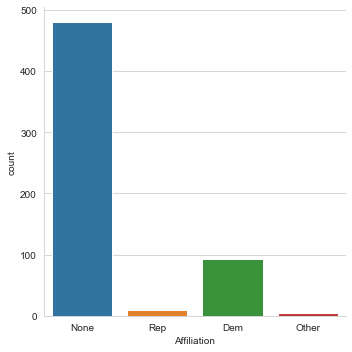

In [69]:
###Quickly visualising the affiliations of the different pollsters.


sns.catplot(x='Affiliation',data=poll,kind='count')

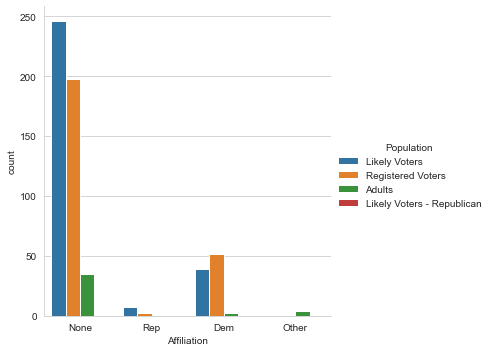

In [70]:
##Most of the polls have no affiliation; though there's stronger affiliation for Democrats than for Republicans.
sns.catplot(x='Affiliation',data=poll,hue='Population',kind='count')

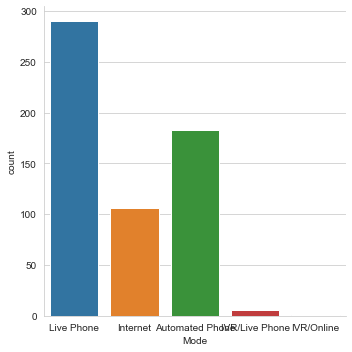

In [74]:
##As there's a strong sample of registered voters that are not affiliated, we can hope that the poll data is a good representation of the upcoming elections.



sns.catplot(x='Mode',data=poll,kind='count')

In [75]:
##Did the poll results favour Romney or Obama?


avg = pd.DataFrame(poll.mean())

avg.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

avg



C:\Users\HP\AppData\Local\Temp\ipykernel_13600\4267165339.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = pd.DataFrame(poll.mean())


,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


C:\Users\HP\anaconda\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\HP\anaconda\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


<AxesSubplot:>

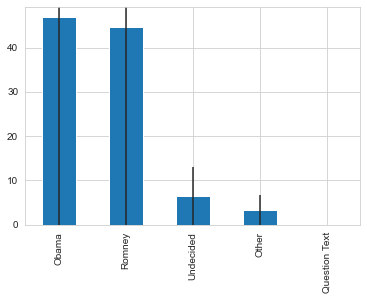

In [78]:
avg.plot(yerr=avg,kind='bar',legend=False)

In [79]:
##How did voter sentiment change over time?


poll['Difference'] = (poll.Romney - poll.Obama)/100

poll.head()



,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,-0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,-0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,0.01


In [80]:
#Grouping polls by the start data
poll = poll.groupby(['Start Date'],as_index=False).mean()

poll.tail()



,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
352,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,NaN,1.0,-0.0150
353,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,NaN,1.0,-0.0175
354,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,NaN,1.0,-0.0075
355,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,NaN,1.0,-0.0050
356,2012-11-04,1000.000000,47.00,47.00,6.000000,NaN,NaN,1.0,0.0000


<AxesSubplot:xlabel='Start Date'>

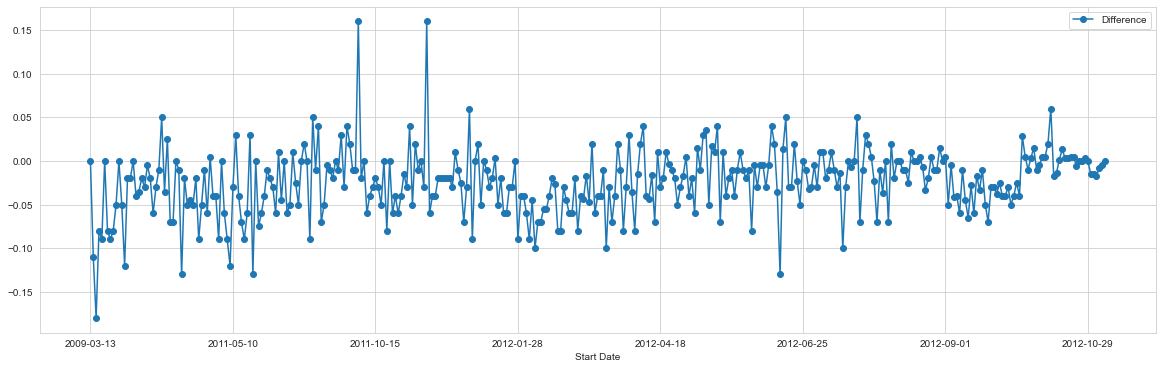

In [84]:
poll.plot('Start Date','Difference',figsize=(20,6),marker='o',linestyle='-')

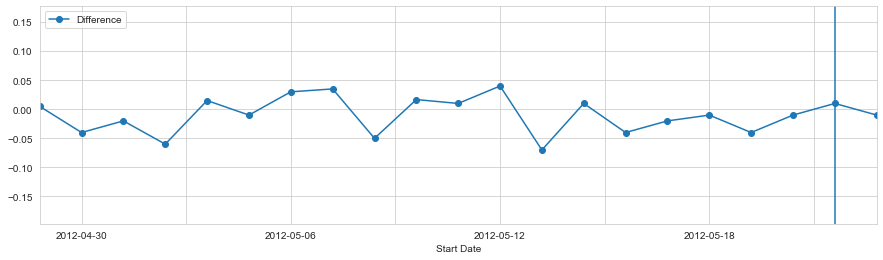

In [85]:
poll.plot('Start Date','Difference',figsize=(15,4),marker='o',linestyle='-',xlim=(209,229))

#Vertical line for debate date
plt.axvline(x=228)

In [86]:
poll.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1.0,-0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1.0,-0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1.0,-0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1.0,-0.09
